In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

In [2]:
folder = os.path.expanduser('~/Desktop/Machine Learning/data_ML_Project')
file_path = os.path.join(folder, 'Zimmer.csv')  # No extension

if os.path.exists(file_path):
    data = pd.read_csv(file_path)
else:
    print("File still not found!")

In [3]:
data.head()

date  AbnormalAccruals  Accruals  AccrualsBM  Activism1  Activism2  \
0  1926-01-30               NaN       NaN         NaN        NaN        NaN   
1  1926-02-27               NaN       NaN         NaN        NaN        NaN   
2  1926-03-31               NaN       NaN         NaN        NaN        NaN   
3  1926-04-30               NaN       NaN         NaN        NaN        NaN   
4  1926-05-28               NaN       NaN         NaN        NaN        NaN   

   AdExp  AgeIPO  AM  AnalystRevision  ...  TotalAccruals  UpRecomm  VarCF  \
0    NaN     NaN NaN              NaN  ...            NaN       NaN    NaN   
1    NaN     NaN NaN              NaN  ...            NaN       NaN    NaN   
2    NaN     NaN NaN              NaN  ...            NaN       NaN    NaN   
3    NaN     NaN NaN              NaN  ...            NaN       NaN    NaN   
4    NaN     NaN NaN              NaN  ...            NaN       NaN    NaN   

   VolMkt  VolSD  VolumeTrend  XFIN  zerotrade  zerotradeAlt1  zerotradeAlt12  
0     NaN    NaN          NaN   NaN        NaN            NaN             NaN  
1     NaN    NaN          NaN   NaN        NaN            NaN             NaN  
2     NaN    NaN          NaN   NaN        NaN            NaN             NaN  
3     NaN    NaN          NaN   NaN        NaN            NaN             NaN  
4     NaN    NaN          NaN   NaN        NaN            NaN             NaN  

[5 rows x 206 columns]

In [4]:
# Find columns with string (object or string) dtype
print("String columns:", data.select_dtypes(include=["object", "string"]).columns.tolist())

String columns: ['date']


In [5]:
# Identify constant columns (excluding NaNs)
constant_columns = [col for col in data.columns 
                    if data[col].nunique(dropna=True) == 1]

print("Constant columns:")
print(constant_columns)
print(f"Total constant columns: {len(constant_columns)}")

Constant columns:
[]
Total constant columns: 0


In [6]:
# Identify columns where more than 80% of values are NaN
nan_majority_columns = [column for column in data.columns if data[column].isna().mean() > 0.8]

print("Columns where the majority of values were converted to NaN:", nan_majority_columns)


Columns where the majority of values were converted to NaN: ['Activism1', 'Activism2', 'Governance']


In [7]:
# List of columns to drop
columns_to_drop = [ 
'Activism1', 'Activism2', 'Governance',
]

data.drop(columns=columns_to_drop, inplace=True)

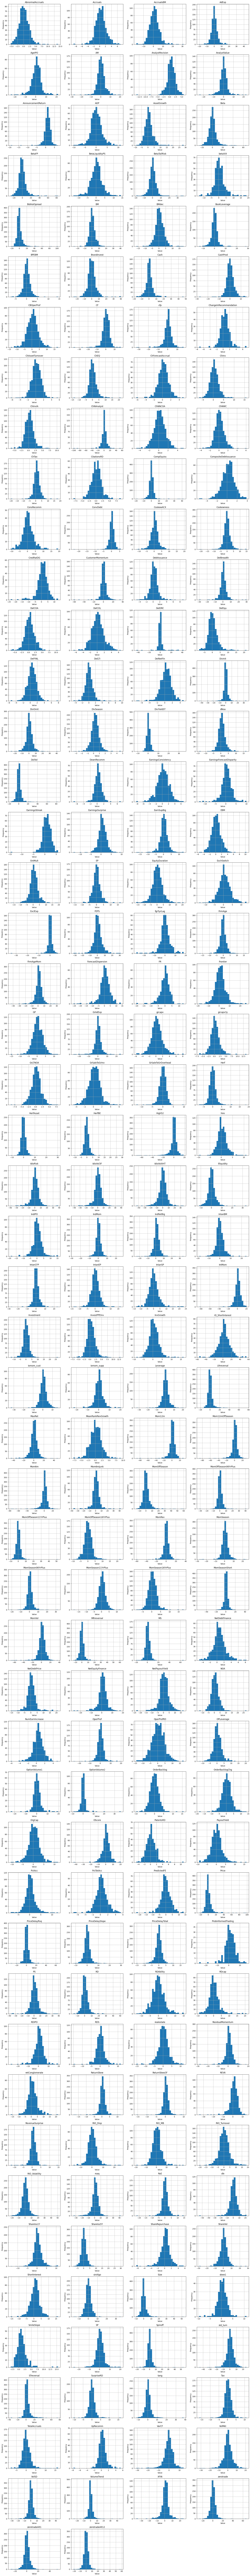

In [8]:
# Exclude identifier columns
exclude_columns = ['date']
columns = [col for col in data.columns if col not in exclude_columns]

# Define number of subplots
n = len(columns)
cols = 4  # Number of plots per row
rows = math.ceil(n / cols)

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows))
axes = axes.flatten()

# Plot each distribution
for i, col in enumerate(columns):
    data[col].hist(bins=30, ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel("Value")
    axes[i].set_ylabel("Frequency")

# Hide unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

Since the majority of the plots are normally distributed we will impute the missing NaN values following a random normal distribution.

In [9]:
for col in columns :
    # Normal imputation
    col_nonan = data[col].dropna()
    mean_val = col_nonan.mean()
    std_val = col_nonan.std()
    if pd.notna(mean_val) and pd.notna(std_val) and std_val > 0:
        num_missing = data[col].isna().sum()
        random_values = np.random.normal(loc=mean_val, scale=std_val, size=num_missing)
        data.loc[data[col].isna(), col] = random_values

In [10]:
# Define end-of-month dates from 2021-01-31 to 2024-12-31
new_dates = pd.date_range(start='2021-01-31', end='2024-12-31', freq='M')

# Create a new DataFrame with these dates
new_rows = pd.DataFrame({'date': new_dates})

# For each column, fill with normally distributed random values based on existing stats
for col in columns:
    col_nonan = data[col].dropna()
    mean_val = col_nonan.mean()
    std_val = col_nonan.std()
    if pd.notna(mean_val) and pd.notna(std_val) and std_val > 0:
        new_rows[col] = np.random.normal(loc=mean_val, scale=std_val, size=len(new_rows))

# Concatenate new rows to original data
data = pd.concat([data, new_rows], ignore_index=True)



/var/folders/rj/fv3npnl910bd6btffd6d3ph80000gn/T/ipykernel_87547/3661656267.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  new_dates = pd.date_range(start='2021-01-31', end='2024-12-31', freq='M')
/var/folders/rj/fv3npnl910bd6btffd6d3ph80000gn/T/ipykernel_87547/3661656267.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_rows[col] = np.random.normal(loc=mean_val, scale=std_val, size=len(new_rows))
/var/folders/rj/fv3npnl910bd6btffd6d3ph80000gn/T/ipykernel_87547/3661656267.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.

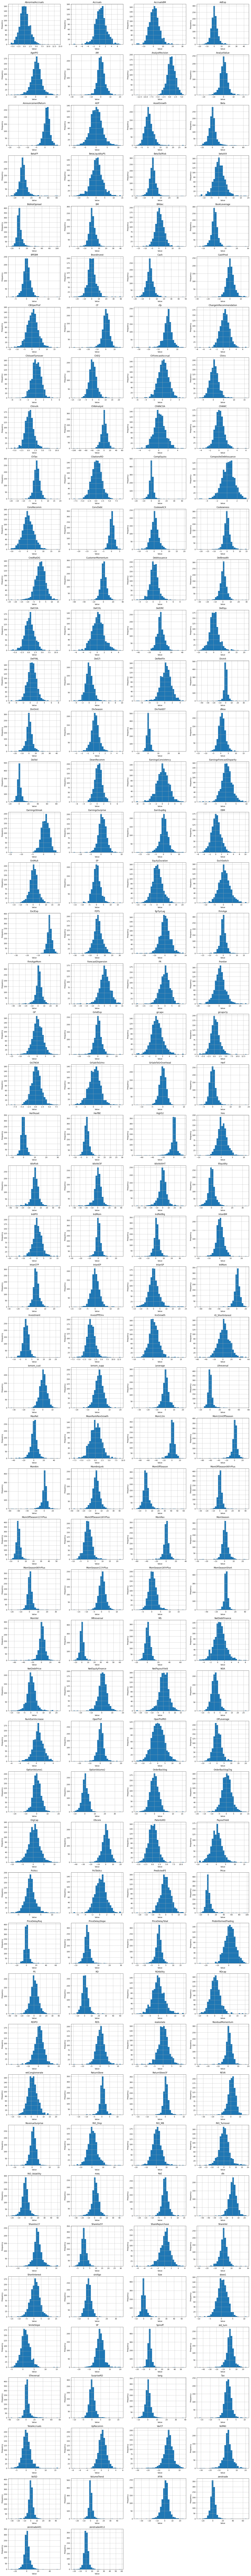

In [11]:
# Exclude identifier columns
exclude_columns = ['date']
columns = [col for col in data.columns if col not in exclude_columns]

# Define number of subplots
n = len(columns)
cols = 4  # Number of plots per row
rows = math.ceil(n / cols)

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows))
axes = axes.flatten()

# Plot each distribution
for i, col in enumerate(columns):
    data[col].hist(bins=30, ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel("Value")
    axes[i].set_ylabel("Frequency")

# Hide unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

In [12]:
# First, parse the 'date' column into datetime objects
data['date'] = pd.to_datetime(data['date'], errors='coerce')

# Now normalize: remove the time part
data['date'] = data['date'].dt.date  # keeps only the date (YY-MM-DD)

data.to_csv("Zimmer_filtered.csv", index=False)